In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plot

In [2]:
df = pd.read_csv("simulación_z.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position
0,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",Classic,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]"
1,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ROTH,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]"
2,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",PHAT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]"
3,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",SCOT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]"
4,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ECKART,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]"
...,...,...,...,...,...,...,...,...,...,...
3745,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ROTH,90.000,135.100,0.06278,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]"
3746,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",PHAT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]"
3747,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",SCOT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]"
3748,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ECKART,90.000,72.297,0.00967,[[ 0. 63.24 28.05 75.38]\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]"


In [3]:
source_position = df["source.position"]
source_pos_list = list(source_position.values)
mic_array_position = df["mic_array.position"]
mic_array_position_list = list(mic_array_position.values)

In [4]:

def get_position(pos_list, axis=False):
    final_pos = []
    for pos in pos_list:
        new_pos = pos.strip()
        new_pos = new_pos.replace("[", "")
        new_pos = new_pos.replace("]", "")
        x, y, z = new_pos.split(",")
        x = np.round(float(x), 2)
        y = np.round(float(y), 2)
        z = np.round(float(z), 2)
        if not axis:
            final_pos.append([x, y, z])
        if axis == "x":
            final_pos.append(x)
        elif axis == "y":
            final_pos.append(y)
        elif axis == "z":
            final_pos.append(z)
        else:
            ValueError("Not possible axis")
    return final_pos


In [5]:
x_source, y_source, z_source = get_position(source_pos_list, axis="x"), get_position(source_pos_list, axis="y"), get_position(source_pos_list, axis="z")
x_arr, y_arr, z_arr = get_position(mic_array_position, axis="x"), get_position(mic_array_position, axis="y"), get_position(mic_array_position, axis="z")

x_source, y_source, z_source = np.array(x_source), np.array(y_source), np.array(z_source)
x_arr, y_arr, z_arr = np.array(x_arr), np.array(y_arr), np.array(z_arr)

distance = np.sqrt((x_source-x_arr)**2 + (y_source-y_arr)**2 + (z_source-z_arr)**2)
distance = np.round(distance, 2)


z_ang = []
for i in range(len(z_source)):
    diff_z = np.absolute(z_source[i] - z_arr[i])
    phi = np.arccos(diff_z/distance[i])
    phi_ang = np.round(np.rad2deg(phi),0)
    z_ang.append(phi_ang)


df["mic-source distance"] = distance
df["source_z"] = z_source
df["z angle"] = z_ang
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position,mic-source distance,source_z,z angle
0,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",Classic,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0
1,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ROTH,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0
2,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",PHAT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0
3,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",SCOT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0
4,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ECKART,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ROTH,90.000,135.100,0.06278,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0
3746,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",PHAT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0
3747,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",SCOT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0
3748,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ECKART,90.000,72.297,0.00967,[[ 0. 63.24 28.05 75.38]\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0


In [6]:
def angle_range(angles):
    ang_list = []
    for ang in angles:
        if ang >= 0 and ang <= 30:
            ang_list.append(1)
        elif ang > 30 and ang<= 60:
            ang_list.append(2)
        elif ang > 60 and ang <= 90:
            ang_list.append(3)
        elif ang >90 and ang <= 180:
            ang_list.append(4)
        else:
            ValueError(f'Todo esto está cursed')
    return ang_list

angle_ranges = angle_range(z_ang)
df["angle ranges"] = angle_ranges

In [7]:
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position,mic-source distance,source_z,z angle,angle ranges
0,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",Classic,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
1,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ROTH,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
2,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",PHAT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
3,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",SCOT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
4,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ECKART,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ROTH,90.000,135.100,0.06278,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
3746,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",PHAT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
3747,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",SCOT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
3748,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ECKART,90.000,72.297,0.00967,[[ 0. 63.24 28.05 75.38]\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3


c:\Users\joaqo\OneDrive\Escritorio\facultad\materias\DSP\DSP-TP\plot.py:439: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, errorbar=errorbar, palette="hls")


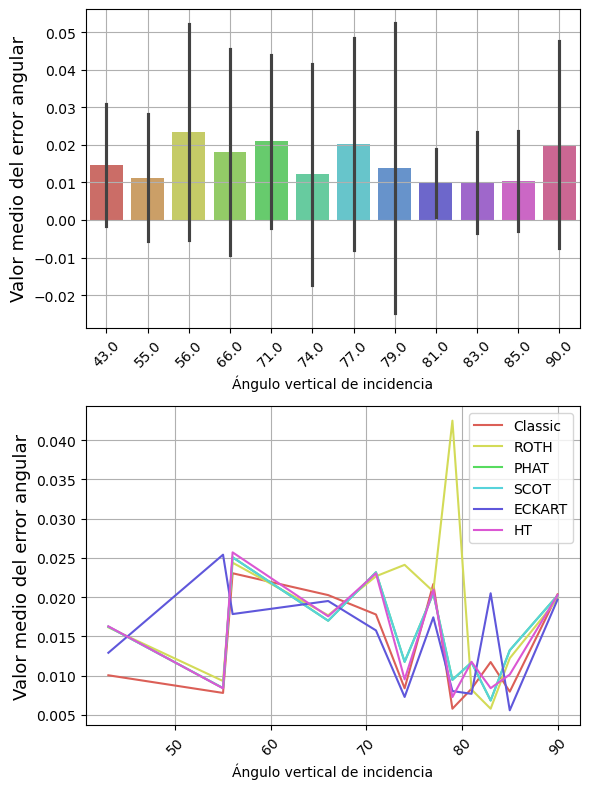

In [8]:
angles_bars_pd = lambda: plot.plot_bars_error(df, "z angle", "error", errorbar="sd", x_label="Ángulo vertical de incidencia", y_label="Valor medio del error angular", grid=True, rotation=45, show=False)
angles_pond_lines_pd = lambda: plot.plot_lines_error(df, "z angle", "error", hue="method", x_label="Ángulo vertical de incidencia", y_label="Valor medio del error angular", grid=True, rotation=45, legend=True, show=False)


plot.multiplot(angles_bars_pd, angles_pond_lines_pd, figsize=(6, 8), ncols=1)

In [9]:
df = df[df["method"] != "ECKART"]
df = df[df["method"] != "Classic"]
df = df[df["method"] != "HT"]
df = df[df["method"] != "ROTH"]

In [10]:
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position,mic-source distance,source_z,z angle,angle ranges
2,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",PHAT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
3,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",SCOT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
8,"sim_T0.20s_d0.1_s[3.0,8.0,1.0]_m[5.0,2.0,1.0]",PHAT,110.136,109.725,0.00001,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 1.0]",6.32,1.0,90.0,3
9,"sim_T0.20s_d0.1_s[3.0,8.0,1.0]_m[5.0,2.0,1.0]",SCOT,110.136,109.725,0.00001,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 1.0]",6.32,1.0,90.0,3
14,"sim_T0.20s_d0.1_s[3.0,8.0,1.5]_m[5.0,2.0,1.0]",PHAT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\n [ nan 0. ...,0.2,0.1,"[5, 2, 1]","[3, 8, 1.5]",6.34,1.5,85.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,"sim_T0.80s_d1.0_s[7.0,7.0,1.5]_m[5.0,2.0,1.0]",SCOT,90.000,105.545,0.00746,[[ 0. 92.87 90.2 180. ]\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 1.5]",5.41,1.5,85.0,3
3740,"sim_T0.80s_d1.0_s[7.0,7.0,2.0]_m[5.0,2.0,1.0]",PHAT,90.000,107.970,0.00997,[[ 0. 89.59 90.2 89.86]\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.0]",5.48,2.0,79.0,3
3741,"sim_T0.80s_d1.0_s[7.0,7.0,2.0]_m[5.0,2.0,1.0]",SCOT,90.000,107.970,0.00997,[[ 0. 89.59 90.2 89.86]\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.0]",5.48,2.0,79.0,3
3746,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",PHAT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\n [ nan 0. 0....,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
